<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Ted-Talk-views-prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ted Talk Views Prediction**

###TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.


###***Dataset Information***

* Number of instances: 4,005

* Number of attributes: 19




###***Features information***:



* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###***Target Variable*** :

* **views**: Count of views



###***Objective***: 
* The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [ ]:
Ted_df = pd.read_csv("/content/drive/MyDrive/Ted Talks Views Prediction - Aehteshaam Shaikh/data_ted_talks.csv")

#Exploratory Data Analysis 

In [ ]:
# Let's see how the dataset looks like
Ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
Ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* The Dataset consist of total 19 features and 4005 entries with some features consisting of Null Values

* Out of these 19 columns only 4 are Numeric and rest are either categorical or textual.

In [ ]:
# Checking if any Duplicate values are present in the Dataset
Ted_df.duplicated().sum()

0

In [ ]:
Ted_df.describe(include = 'all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,"See how the rest of the world lives, organized...",Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{654: 'Claim your ""manspace""', 225: 'Model roc...",https://www.ted.com/talks/eve_ensler_what_secu...,Frustrated by not being able to sing two notes...,"(Exhales deeply) Today, right? Please join me ..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


###Handling the Null values in the Dataset

In [ ]:
Ted_df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
Ted_df['about_speakers'][0]    

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

As the 'about_speakers column gives the description about the speaker which may not be helpful in our journey

In [ ]:
Ted_df.drop(['talk_id','about_speakers'],axis=1,inplace=True)

In [ ]:
# Replacing the Null values with suitable value
Ted_df['recorded_date'].fillna('',inplace=True)  
Ted_df['comments'].fillna(Ted_df['comments'].mean(),inplace=True)
Ted_df['all_speakers'].fillna('',inplace= True)

In [ ]:
# Setting the Null values in Occupation column to Others Category
Ted_df['occupations'].fillna(str({0:['Other']}),inplace = True)

In [ ]:
Ted_df.isna().sum()

title             0
speaker_1         0
all_speakers      0
occupations       0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

###Exploring the Published Date Column :

In [ ]:
# Converting Published date column to datetime type
Ted_df['published_date'] = Ted_df['published_date'].apply((lambda x: datetime.strptime(x,"%Y-%m-%d")))

In [ ]:
#extracting release day, month and year from the published date column
Ted_df['release_day']   = Ted_df['published_date'].apply(lambda x: x.weekday())
Ted_df['release_month'] = Ted_df['published_date'].apply(lambda x: x.month)
Ted_df['release_year']  = Ted_df['published_date'].apply(lambda x: x.year)

In [ ]:
Ted_df

,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,release_day,release_month,release_year
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000000,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000000,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000000,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006
3,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000000,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1,6,2006
4,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000000,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1,6,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.000000,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",0,4,2020
4001,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: ['Other']},307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",161.997015,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",0,4,2020
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.000000,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,1,4,2020
4

In [ ]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
Ted_df['release_day']=Ted_df['release_day'].map(week_day)

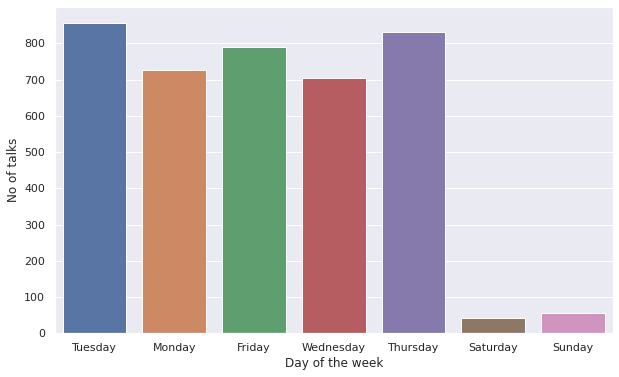

In [ ]:
# checking the day of the week having maximum release date
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='release_day', data=Ted_df)
plt.xlabel('Day of the week')
plt.ylabel('No of talks');

* Most no of talks were released on tuesday followed by thursday

* As we can see on saturday and sunday very less ted talk videos were published


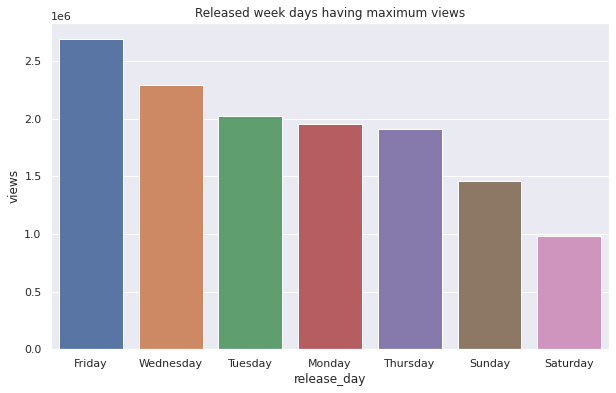

In [ ]:
# release days with respect to views
views_per_day=Ted_df.groupby('release_day')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=views_per_day)

* Most no of views are for the videos which are released on Friday

In [ ]:
#encoding release_month column with month names
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Ted_df['release_month']=Ted_df['release_month'].map(month_dict)


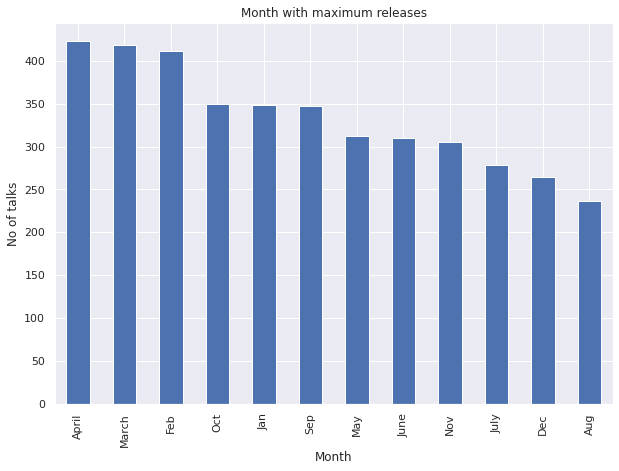

In [ ]:
#checking months having maximum release 
plt.figure(figsize=(10,7))
Ted_df['release_month'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Month with maximum releases')
plt.xlabel('Month')
plt.ylabel('No of talks');



* Most no of talks were released in April followed by March and Feb.

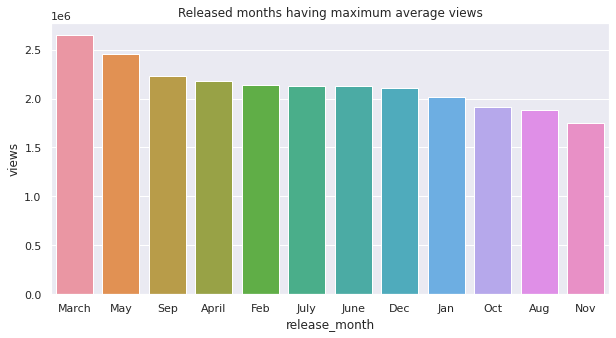

In [ ]:
# Most popular release month by average Views
views_per_month=Ted_df.groupby('release_month')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=views_per_month)

* Talks released in March have most views followed by May.

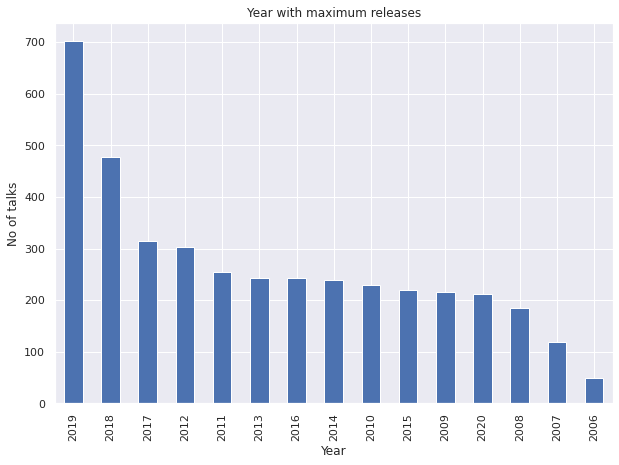

In [ ]:
#checking years having maximum release 
plt.figure(figsize=(10,7))
Ted_df['release_year'].value_counts().plot(kind='bar')
plt.title('Year with maximum releases')
plt.xlabel('Year')
plt.ylabel('No of talks');

* Most no of Talks were released in year 2019 

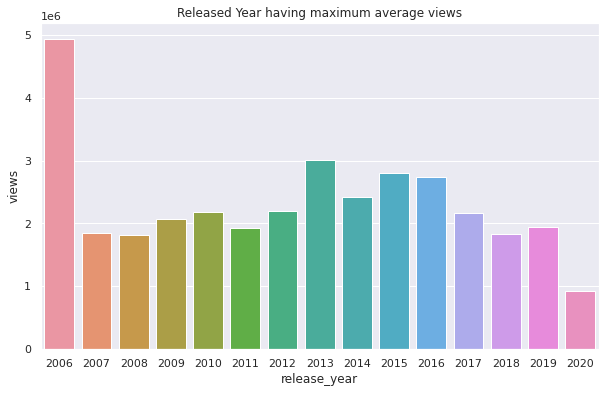

In [ ]:
# Most popular release year by to average Views
views_per_year=Ted_df.groupby('release_year')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.title('Released Year having maximum average views')
sns.barplot(x='release_year',y='views',data=views_per_year)

* Most no of Talks were released in year 2019 but Talks released in the year 2006 have the maximum views.

In [ ]:
# Most viewed Ted Talks
most_viewed=Ted_df.nlargest(5, ['views'])
most_viewed[['speaker_1','views','title','release_year','duration']]

,speaker_1,views,title,release_year,duration
4,Sir Ken Robinson,65051954,Do schools kill creativity?,2006,1164
1296,Amy Cuddy,57074270,Your body language may shape who you are,2012,1262
2062,James Veitch,56932551,This is what happens when you reply to spam email,2016,588
646,Simon Sinek,49730580,How great leaders inspire action,2010,1084
796,Brené Brown,47544833,The power of vulnerability,2010,1219


* Sir Ken Robinson's 'Do schools kill creativity?' is the most viewed Talk with more than 65 million views.

In [ ]:
# Most listened speaker
Ted_df.groupby('speaker_1')['views'].sum().nlargest(15).reset_index()

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


* Alex Gendler is the most Popular speaker followed by Sir Ken Robinson	 

In [ ]:
# exploring the various event categories
events=Ted_df.groupby('event')['views'].sum().nlargest(10).reset_index()

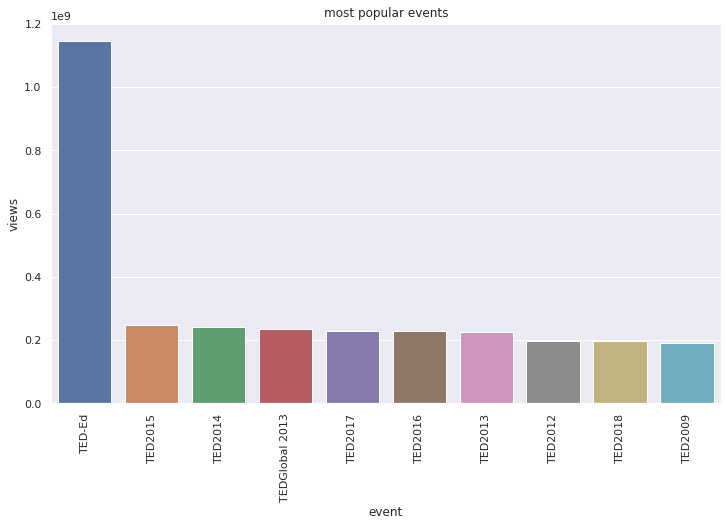

In [ ]:
# Most popular event by No of Views
plt.figure(figsize=(12,7))
plt.title('most popular events')
sns.barplot(x='event',y='views',data=events)
plt.xticks(rotation=90)
plt.show()

* TED-Ed is the most popular event category with most no of views 

Text(0.5, 1.0, 'Native language')

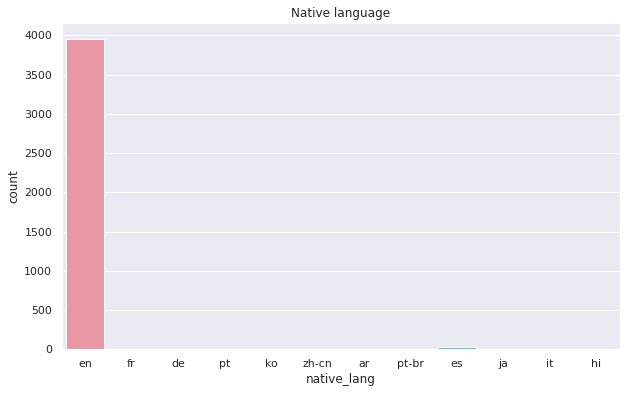

In [ ]:
# native language column
#plotting the countplot of native_lang column
plt.figure(figsize=(10,6))
sns.countplot(x=Ted_df['native_lang'])
plt.title('Native language')

* almost 99% videos are recorded in english language

* We should drop this column as the data is very biased here

In [ ]:
# applying eval on occupations column
Ted_df['occupations'] = Ted_df.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
#iterating through the each row and extracting occupations of speakers
for index, row in Ted_df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    Ted_df.loc[index,'occupation'] = str(occup_list)

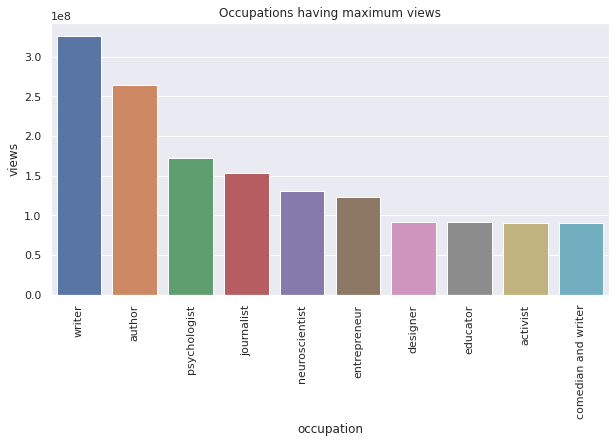

In [ ]:
# Most popular Occupations in terms of no of views
occupation_views=Ted_df.groupby('occupation')['views'].sum().sort_values(ascending=False)[1:11].reset_index()
plt.figure(figsize=(10,5))
plt.title('Occupations having maximum views')
sns.barplot(x='occupation',y='views',data=occupation_views)
plt.xticks(rotation=90);


* Speakers who are Writers are most popular followed by Authors and Psychologists

In [ ]:
# Most discussed Ted Talks
Ted_df.groupby('title')['comments'].sum().sort_values(ascending=False)[0:10].reset_index()


,title,comments
0,Militant atheism,6449.0
1,Do schools kill creativity?,4931.0
2,Science can answer moral questions,3424.0
3,How do you explain consciousness?,3006.0
4,My stroke of insight,2984.0
5,Your body language may shape who you are,2633.0
6,Taking imagination seriously,2529.0
7,On reading the Koran,2463.0
8,The danger of science denial,2366.0
9,The power of vulnerability,2209.0


* It seems that most of the debated topics are related to mainly Science and Religion 

### Exploring the Numerical Features

In [ ]:
numerical_features = Ted_df.describe().columns

In [ ]:
numerical_features

Index(['views', 'comments', 'duration', 'release_year'], dtype='object')

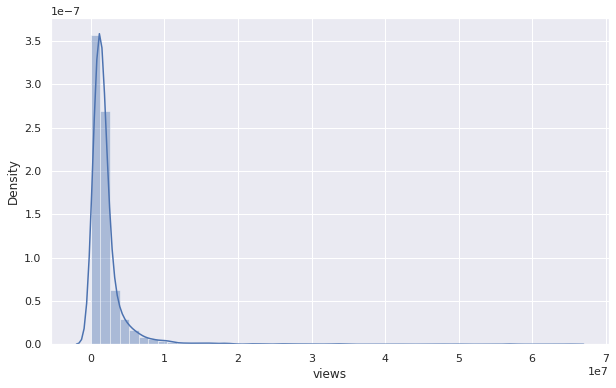

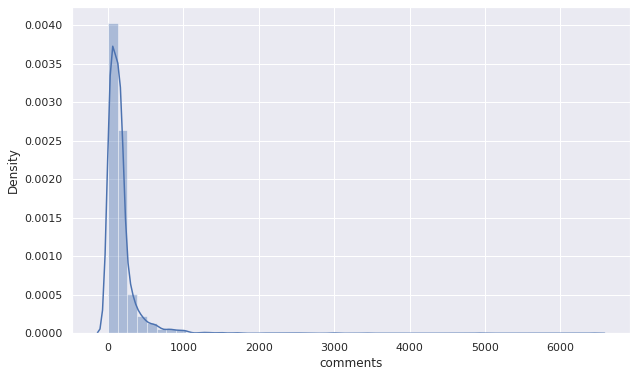

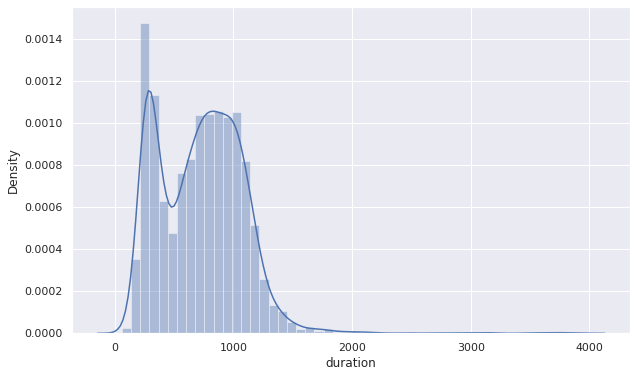

In [ ]:
# plotting the numerical features
for feature in numerical_features[:3]:
  plt.figure(figsize=(10,6))
  sns.distplot((Ted_df[feature]),color='b')
  plt.xlabel(feature)

* All of the variables are rightly skewed

###Categorical Features

* In Mean Encoding each distinct value of categorical variable is replaced with average value of target variable.

In [ ]:
#Applying Mean Encoding on speaker_1 column since it has high cardinality
mean_encoding_speaker = Ted_df.groupby('speaker_1')['views'].mean().to_dict()
Ted_df['avg_views_by_speaker']=Ted_df['speaker_1'].map(mean_encoding_speaker)

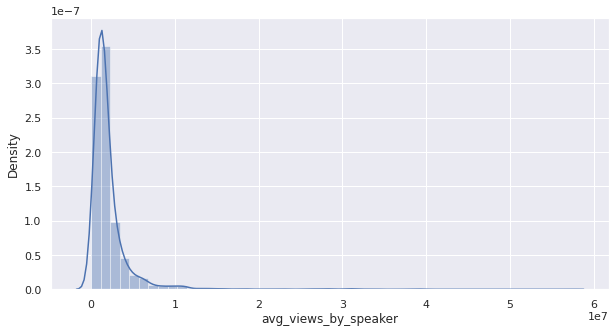

In [ ]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(Ted_df['avg_views_by_speaker'])

In [ ]:
#Applying Mean Encoding on event column 
mean_encoding_event = Ted_df.groupby('event')['views'].mean().to_dict()
Ted_df['avg_views_by_event']=Ted_df['event'].map(mean_encoding_event)

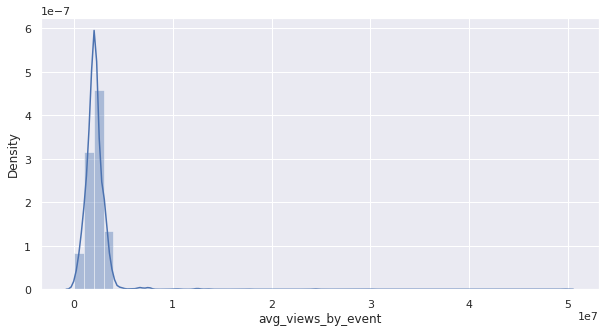

In [ ]:
#Let's plot the avg_views_by_event column
plt.figure(figsize=(10,5))
sns.distplot(Ted_df['avg_views_by_event'])

* Adding a new feature which contain the count of total no of languages for a particular video.

In [ ]:
Ted_df['total_lang'] = Ted_df.apply(lambda x: len(x['available_lang']), axis=1)

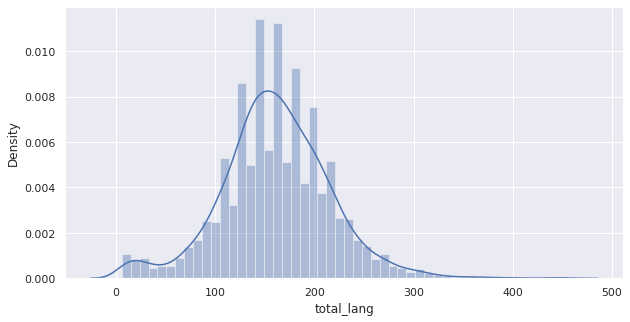

In [ ]:
# plotting the total language column
plt.figure(figsize=(10,5))
sns.distplot(Ted_df['total_lang'])

* Adding a new feature which contain total no of topics for a particular video.

In [ ]:
Ted_df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:
# applying eval on topics column
Ted_df['topics'] = Ted_df.apply(lambda row: eval(row['topics']), axis=1)

In [ ]:
Ted_df['no_of_topics'] = Ted_df.apply(lambda x: len(x['topics']), axis=1)

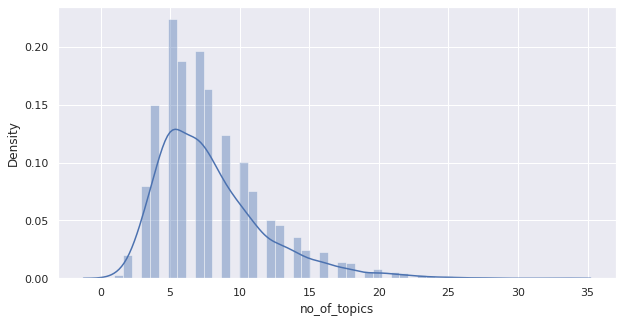

In [ ]:
# plotting no of topics column
plt.figure(figsize=(10,5))
sns.distplot(Ted_df['no_of_topics'])

* We can add a new column called video_age which is the difference of current year and published year.

In [ ]:
Ted_df['video_age']=2021-Ted_df['release_year']


* Now we can drop the columns which are not required

In [ ]:
Ted_df.drop(['title','all_speakers','recorded_date','release_year','topics','available_lang','event','speaker_1','url','transcript','description','native_lang','occupations','occupation','published_date','related_talks'],axis=1,inplace=True)

In [ ]:
# creating copy of the dataset
df=Ted_df.copy()
Ted_df=df.copy()

###Outliers Treatment

In [ ]:
#checking the outliers
Q1 = Ted_df.quantile(0.25)
Q3 = Ted_df.quantile(0.75)
IQR = Q3 - Q1

((Ted_df < (Q1 - 1.5 * IQR)) | (Ted_df > (Q3 + 1.5 * IQR))).sum()

avg_views_by_event      156
avg_views_by_speaker    373
comments                361
duration                 21
no_of_topics            116
release_day               0
release_month             0
total_lang              143
video_age                 0
views                   393
dtype: int64

In [ ]:
# Replacing outliers with extreme values
for i in ['avg_views_by_event','avg_views_by_speaker','comments','duration','no_of_topics','total_lang','views']:
  Q1 = Ted_df[i].quantile(0.25)
  Q3 = Ted_df[i].quantile(0.75)
  IQR = Q3 - Q1

  Ted_df[i]=np.where(Ted_df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(Ted_df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),Ted_df[i]))

In [ ]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((Ted_df < (Q1 - 1.5 * IQR)) | (Ted_df > (Q3 + 1.5 * IQR))).sum()

avg_views_by_event      0
avg_views_by_speaker    0
comments                0
duration                0
no_of_topics            0
release_day             0
release_month           0
total_lang              0
video_age               0
views                   0
dtype: int64

In [ ]:
#separating the dependent and independent variables
y=Ted_df['views']
x=Ted_df.drop(columns='views')

In [ ]:
x.head(1)

,comments,duration,release_day,release_month,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age
0,272.0,977.0,Tuesday,June,2190599.25,3.778944e+06,270.0,9.0,15


###One hot encoding:

In [ ]:
# Performing one hot encoding on the dependent variables
x=pd.get_dummies(x)
x.shape

(4005, 26)

In [ ]:
x.head(1)

,comments,duration,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,release_day_Sunday,release_day_Thursday,release_day_Tuesday,release_day_Wednesday,release_month_April,release_month_Aug,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,270.0,9.0,15,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


###Feature Selection:

In [ ]:
# using f-scores to do feature selection
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#finding the f scores of each feature
f_scores = f_regression(x, y)
f_scores

(array([7.89640116e+02, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.36302821e+02, 2.22138034e+00, 7.26280093e-01, 4.93457071e+01,
        2.14095360e+00, 1.69801520e+01, 1.32688878e+01, 4.22782469e+00,
        1.54608611e+00, 5.17596240e-03, 4.42937898e+00, 5.29481408e-01,
        3.19042540e+00, 9.10855944e-01, 3.61273001e+00, 1.59320065e+00,
        7.00546927e-01, 1.20164944e+01, 3.34840829e+00, 3.24993722e+00,
        6.69041425e+00, 1.59197663e+00]),
 array([9.90841321e-159, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        5.81214882e-185, 1.36190106e-001, 3.94142602e-001, 2.51061953e-012,
        1.43491232e-001, 3.85368618e-005, 2.73265521e-004, 3.98310726e-002,
        2.13786984e-001, 9.42649939e-001, 3.53875418e-002, 4.66867525e-001,
        7.41463988e-002, 3.39945041e-001, 5.74106856e-002, 2.06942978e-001,
        4.02649944e-001, 5.32863676e-004, 6.73443607e-002, 7.15013746e-002,
        9.72823723e-003, 2.07117470e-001]))

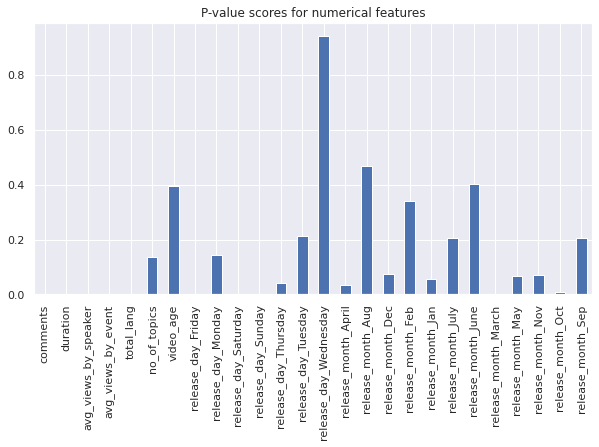

In [ ]:
#Plotting the p-values 
p_values= pd.Series(f_scores[1],index= x.columns)
plt.figure(figsize=(10,5))
p_values.plot(kind='bar')
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
# dropping the features with high p-value
selected_features = np.where(p_values<0.005)[0]
x=x.iloc[0:,selected_features]


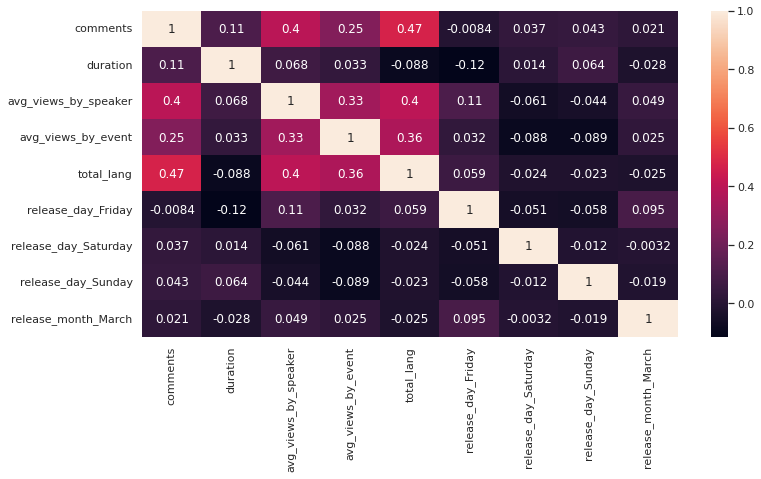

In [ ]:
# plotting the heatmap.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.heatmap(x.corr(),annot=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = x.columns
   vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.912068
1,duration,4.136869
2,avg_views_by_speaker,4.621960
3,avg_views_by_event,9.040717
4,total_lang,10.769324
5,release_day_Friday,1.278824
6,release_day_Saturday,1.022116
7,release_day_Sunday,1.031887
8,release_month_March,1.124586


###since vif for total_lang column is high we can drop this column.

In [ ]:
x.drop('total_lang',axis=1,inplace=True)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.434986
1,duration,4.008254
2,avg_views_by_speaker,4.381047
3,avg_views_by_event,6.079637
4,release_day_Friday,1.262692
5,release_day_Saturday,1.019789
6,release_day_Sunday,1.030452
7,release_month_March,1.124260


###Train and Test Split:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state=123)

In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

(2803, 8) (2803,)


In [ ]:
# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(1202, 8) (1202,)


###**Fitting the Model:**

**1. Linear Regression Model**





In [ ]:
reg = LinearRegression().fit(X_train, Y_train)


In [ ]:
#predicting the values for train set
Y_Train_pred = reg.predict(X_train)

#predicting the values for test set
Y_Test_pred = reg.predict(X_test)

In [ ]:
# Evaluation metrics
Linear_MAE = mean_absolute_error(Y_test, Y_Test_pred)
print("MAE :" ,Linear_MAE)

Linear_MSE  = mean_squared_error((Y_test), (Y_Test_pred))
print("MSE :" , Linear_MSE)

Linear_RMSE = np.sqrt(Linear_MSE)
print("RMSE :" ,Linear_RMSE)

Linear_r2 = r2_score((Y_test), (Y_Test_pred))
print("R2 :" ,Linear_r2)

Linear_adjusted_r2 = 1-(1-r2_score((Y_test), (Y_Test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Linear_adjusted_r2)
  


MAE : 260752.21899696472
MSE : 234841173869.58383
RMSE : 484604.1414077926
R2 : 0.7959370600323038
Adjusted R2 :  0.7945686580878432


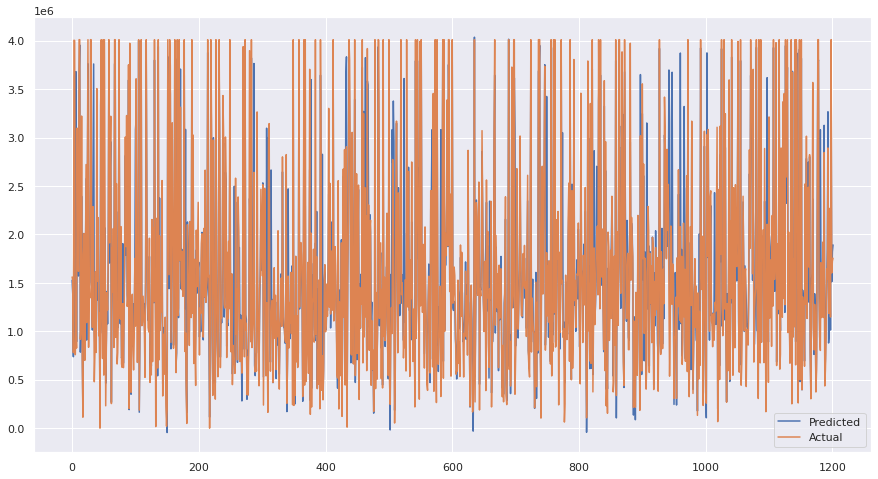

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(Y_Test_pred)
plt.plot(np.array(Y_test))

plt.legend(['Predicted','Actual'])
plt.show()


* After analyzing the evaluation metrics for train and test dataset we can say that linear regression model has performed well



* Applying Lasso Regularization 

In [ ]:
### Cross validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150,160,170,200]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 110, 120, 150, 160, 170,
                                   200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 150}

Using  {'alpha': 150}  the negative mean squared error is:  -231475829182.86703


In [ ]:
lasso  = Lasso(alpha=150 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=150, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, Y_train)

0.8162849093262767

In [ ]:
# predicting the values
Y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# getting the evaluation metrics
Lasso_MAE = mean_absolute_error(Y_test, Y_pred_lasso)
print("MAE :" ,Lasso_MAE)

Lasso_MSE  = mean_squared_error((Y_test), (Y_pred_lasso))
print("MSE :" ,Lasso_MSE)

Lasso_RMSE = np.sqrt(Lasso_MSE)
print("RMSE :" ,Lasso_RMSE)

Lasso_r2 = r2_score((Y_test),(Y_pred_lasso))
print("R2 :" ,Lasso_r2)

Lasso_adjusted_r2 = 1-(1-r2_score((Y_test), (Y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lasso_adjusted_r2)

MAE : 260508.8263454157
MSE : 234761921364.77924
RMSE : 484522.36415337864
R2 : 0.796005925720819
Adjusted R2 :  0.7946379855747725


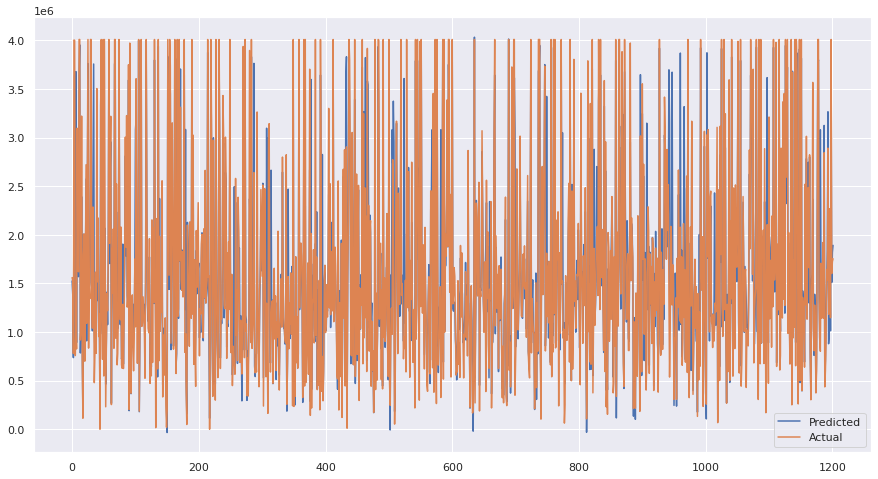

In [ ]:
plt.figure(figsize=(15,8))
plt.plot((Y_pred_lasso))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

* Applying Ridge Regularization:

In [ ]:
# cross validation
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30}

Using  {'alpha': 30}  the negative mean squared error is:  -231284773124.09195


In [ ]:
# predicting the values
Y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# getting the evaluation metrics
Ridge_MAE = mean_absolute_error(Y_test, Y_pred_ridge)
print("MAE :" ,Ridge_MAE)

Ridge_MSE  = mean_squared_error((Y_test), (Y_pred_ridge))
print("MSE :" , Ridge_MSE)

Ridge_RMSE = np.sqrt(Ridge_MSE)
print("RMSE :" ,Ridge_RMSE)

Ridge_r2 = r2_score((Y_test), (Y_pred_ridge))
print("R2 :" ,Ridge_r2)

Ridge_adjusted_r2 = 1-(1-r2_score((Y_test), (Y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Ridge_adjusted_r2)

MAE : 259469.30334901332
MSE : 234348424577.7399
RMSE : 484095.47051975183
R2 : 0.7963652297075947
Adjusted R2 :  0.7949996989763799


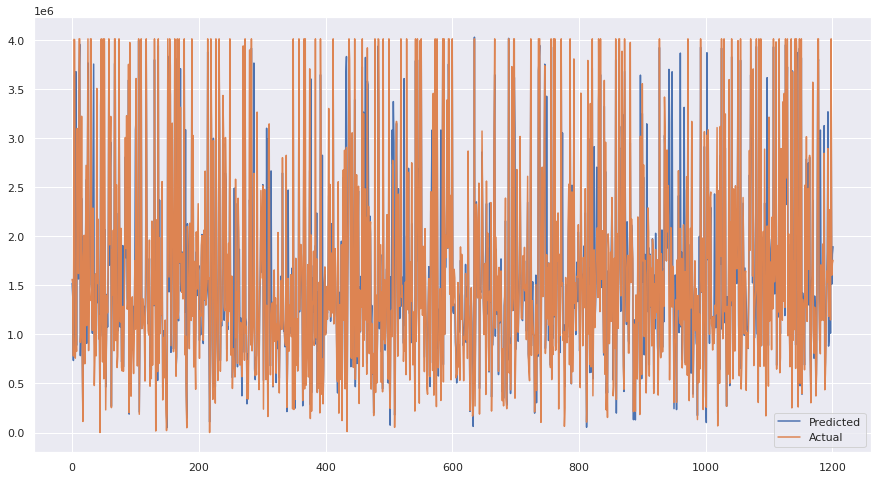

In [ ]:
plt.figure(figsize=(15,8))
plt.plot((Y_pred_ridge))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

* Applying Elastic Net Regularization:

In [ ]:
# cross validation
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 110, 120, 150],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.9}

Using  {'alpha': 0.1, 'l1_ratio': 0.9}  the negative mean squared error is:  -231285331352.67987


In [ ]:
# predicting the values
Y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
# getting the evaluation metrics
Elastic_MAE = mean_absolute_error(Y_test, Y_pred_elastic)
print("MAE :" ,Elastic_MAE)

Elastic_MSE  = mean_squared_error((Y_test), (Y_pred_elastic))
print("MSE :" ,Elastic_MSE)

Elastic_RMSE = np.sqrt(Elastic_MSE)
print("RMSE :" ,Elastic_RMSE)

Elastic_r2 = r2_score((Y_test),(Y_pred_elastic))

print("R2 :" ,Elastic_r2)

Elastic_adjusted_r2 = 1-(1-r2_score((Y_test),(Y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Elastic_adjusted_r2)

MAE : 259519.8834264935
MSE : 234365135511.03714
RMSE : 484112.7301683329
R2 : 0.7963507089056329
Adjusted R2 :  0.7949850808010603


In [ ]:
# Summary 
model_data = pd.DataFrame()
model_data['Model Name'] = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression']
model_data['MSE'] = [Linear_MSE,Ridge_MSE,Lasso_MSE,Elastic_MSE]
model_data['RMSE'] = [Linear_RMSE,Ridge_RMSE,Lasso_RMSE,Elastic_RMSE]
model_data['R2'] = [Linear_r2,Ridge_r2,Lasso_r2,Elastic_r2]
model_data['Adjusted R2'] = [Linear_adjusted_r2,Ridge_adjusted_r2,Lasso_adjusted_r2,Elastic_adjusted_r2]
model_data


,Model Name,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,2.348412e+11,484604.141408,0.795937,0.794569
1,Ridge Regression,2.343484e+11,484095.470520,0.796365,0.795000
2,Lasso Regression,2.347619e+11,484522.364153,0.796006,0.794638
3,Elastic Net Regression,2.343651e+11,484112.730168,0.796351,0.794985


* All the models performed approx. same, but Ridge regularization gave slightly better RMSE, r2 and adjusted r2 score.

2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#applying RandomForestRegressor on default parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, Y_train)
Y_Train_pred_rf = rf.predict(X_train)
Y_Test_pred_rf = rf.predict(X_test)


In [ ]:
# evaluation metrics
print('Train MAE:', mean_absolute_error(Y_train, Y_Train_pred_rf))
print('Test MAE:', mean_absolute_error(Y_test, Y_Test_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y_test, Y_Test_pred_rf)))
print("Train R2 :" ,r2_score((Y_train),(Y_Train_pred_rf)))
print("R2 :" ,r2_score((Y_test),(Y_Test_pred_rf)))
print("Adjusted R2 : ",1-(1-r2_score((Y_test),(Y_Test_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train MAE: 100334.71492329647
Test MAE: 247358.8255740433
Root Mean Squared Error (RMSE): 508514.6624714491
Train R2 : 0.9532254140017263
R2 : 0.7753032160603661
Adjusted R2 :  0.7737964480205362


* Hyperparameter Tuning 

In [ ]:
rf2=RandomForestRegressor(criterion='mae')
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
rf2_grid = GridSearchCV(rf2, param_grid = grid_values, cv=3, n_jobs=-1)

# Fit the object to train dataset
rf2_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mae', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# finding the optimal model w.r.t. best_estimator_
rf2_optimal_model = rf2_grid.best_estimator_

In [ ]:
rf2_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_train_preds_rf2 =  rf2_optimal_model.predict(X_train)
Y_test_preds_rf2  = rf2_optimal_model.predict(X_test)

In [ ]:
# Evaluaton metrics for optimal model 
optimal_rf_model = pd.DataFrame()
optimal_rf_model['Model Name'] = ['Random Forest Regressor']
optimal_rf_model['Train MAE'] = [mean_absolute_error(Y_train, Y_train_preds_rf2)]
optimal_rf_model['Test MAE'] = [mean_absolute_error(Y_test, Y_test_preds_rf2)]
optimal_rf_model['Test RMSE'] = [np.sqrt(mean_squared_error(Y_test, Y_test_preds_rf2))]
optimal_rf_model['Train R2'] = [r2_score((Y_train),(Y_train_preds_rf2))]
optimal_rf_model['Test R2']  = [r2_score((Y_test),(Y_test_preds_rf2))]
optimal_rf_model['Test Adjusted R2'] = [1-(1-r2_score((Y_test),(Y_test_preds_rf2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]
optimal_rf_model


,Model Name,Train MAE,Test MAE,Test RMSE,Train R2,Test R2,Test Adjusted R2
0,Random Forest Regressor,173735.267309,190334.557284,479082.19213,0.842912,0.800561,0.799224


* After hyperparameter tuning, Random Forest Regressor gave the better results than Linear Regression model

In [ ]:
# getting features according to their importance in prediction
features = X_train.columns
importances = rf2_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

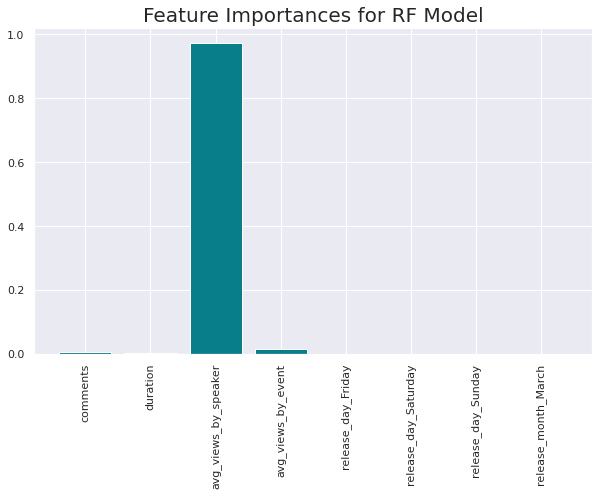

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='#087E8B')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

* Average views by speaker is the most important feature in the model followed by avg views by event 

3. XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, Y_train)

[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# predicting the values
Y_train_preds_xgb =  xgb_optimal_model.predict(X_train)
Y_test_preds_xgb  = xgb_optimal_model.predict(X_test)

In [ ]:
# Evaluaton metrics for optimal model 
optimal_xgb_model = pd.DataFrame()
optimal_xgb_model['Model Name'] = ['XGBRegressor']
optimal_xgb_model['Train MAE'] = [mean_absolute_error(Y_train, Y_train_preds_xgb)]
optimal_xgb_model['Test MAE'] = [mean_absolute_error(Y_test, Y_test_preds_xgb)]
optimal_xgb_model['Test RMSE'] = [np.sqrt(mean_squared_error(Y_test, Y_test_preds_xgb))]
optimal_xgb_model['Train R2'] = [r2_score((Y_train),(Y_train_preds_xgb))]
optimal_xgb_model['Test R2']  = [r2_score((Y_test),(Y_test_preds_xgb))]
optimal_xgb_model['Test Adjusted R2'] = [1-(1-r2_score((Y_test),(Y_test_preds_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]
optimal_xgb_model


,Model Name,Train MAE,Test MAE,Test RMSE,Train R2,Test R2,Test Adjusted R2
0,XGBRegressor,201167.506399,216785.248856,450537.120951,0.867543,0.823619,0.822437


In [ ]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)

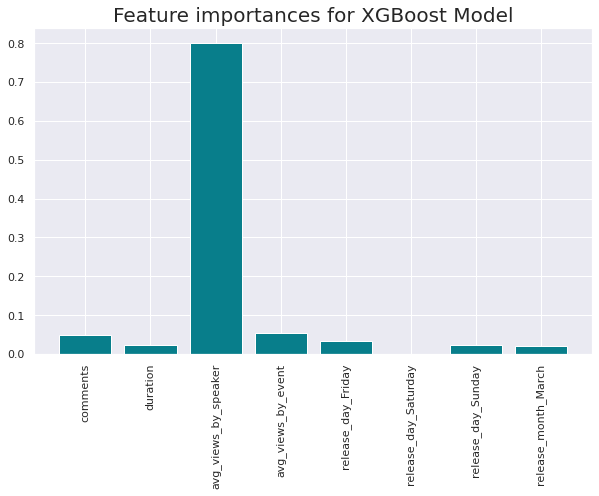

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='#087E8B')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

* Average views by speaker is the most important feature in the XGB regressor model followed by avg views by event

###Comparing all the Models:

In [ ]:
#Defining all these models with optimal parameters
models = [
           ['Linear Regressor: ', LinearRegression()],
          ['Ridge Regressor: ', Ridge(alpha=1.0)],
           ['RandomForest ',RandomForestRegressor(ccp_alpha=0.0, criterion='mae',max_depth=5,min_impurity_decrease=0.0, 
                                                  min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=100, verbose=0)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, 
                                           colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,
                                           max_delta_step=0,max_depth=4, min_child_weight=1, n_estimators=50, n_jobs=1, 
                                           random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1)]        
          ]

In [ ]:

#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    model_dict = {}
    
    model_dict["Model_Name"] = name
    curr_model.fit(X_train,Y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(Y_train, curr_model.predict(X_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(Y_test, curr_model.predict(X_test))
    model_dict["R2_Score_train"] = r2_score(Y_train,curr_model.predict(X_train))
    model_dict["R2_Score_test"] = r2_score(Y_test,curr_model.predict(X_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(Y_train,curr_model.predict(X_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(Y_test,curr_model.predict(X_test)))
    model_data.append(model_dict)

[12:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Summary of all the models
models_df = pd.DataFrame(model_data)


#**Conclusion:**

###After loading the dataset, cleaning the data, performing EDA, dealing with Null Values, Outliers and after feature selection following Models are built.

In [ ]:
models_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Linear Regressor:,259823.070604,260752.218997,0.816289,0.795937,477776.340431,484604.141408
1,Ridge Regressor:,259767.447921,260672.286088,0.816288,0.795967,477776.923731,484568.983037
2,RandomForest,173414.196275,191283.769441,0.842644,0.798129,442179.154470,481994.404890
3,XGBRegressor:,186342.837263,215350.871952,0.884204,0.818376,379318.551255,457184.533771


### In all of the models, it has been observed that the column avg views by speaker is the most important feature in the dataset followed by avg views by event.

###**Best Model Selecton:**

###In terms of RMSE score XGBoost Regressor gave the best results. As, to compare the Accuracy among different regression models, RMSE is a better option as it is simple to calculate and differentiable. However, our dataset has outliers, hence MAE is better metric than RMSE as it is robust to outliers.

###So, after comparing MAE values it is evident that ***Random Forest Regressor*** is the best performer. 